   # Loan Status Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df1 = pd.read_csv("C:/Users/Nikhil Kumar/Desktop/Mani Assignment/loan_status_project/credit/credit_train.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [4]:
df1.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

<Axes: >

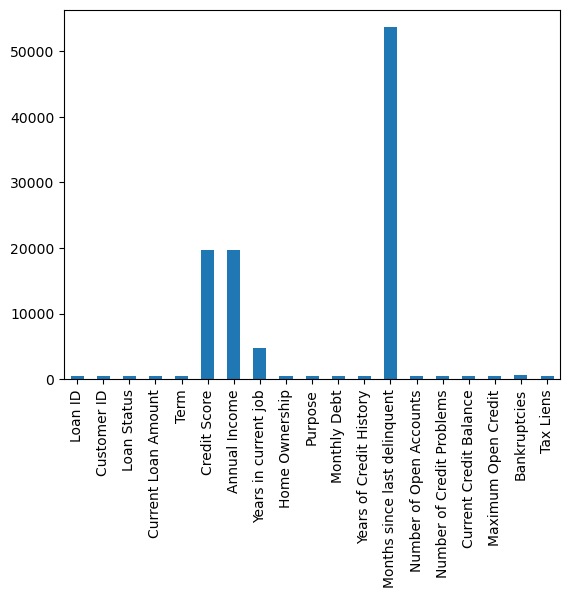

In [5]:
df1.isna().sum().plot(kind='bar')    # missing values visualization

In [6]:
df1[df1['Loan ID'].isna()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# We will delete these rows from our data because all columns are having null values here.

In [8]:
df1 = df1.dropna(axis = 0, subset = ['Loan ID'])

In [9]:
df1.isna().sum().sort_values(ascending=False)

Months since last delinquent    53141
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Bankruptcies                      204
Tax Liens                          10
Maximum Open Credit                 2
Years of Credit History             0
Current Credit Balance              0
Number of Credit Problems           0
Number of Open Accounts             0
Loan ID                             0
Monthly Debt                        0
Customer ID                         0
Home Ownership                      0
Term                                0
Current Loan Amount                 0
Loan Status                         0
Purpose                             0
dtype: int64

In [10]:
df1[df1['Tax Liens'].isna()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
9632,62eb07d6-2042-4e7e-92e5-c64e5c5e550f,3ffba32a-149b-4346-b433-a9fedfb2fb4c,Fully Paid,99999999.0,Short Term,632.0,968202.0,1 year,Rent,Debt Consolidation,10166.14,13.0,0.0,12.0,0.0,57038.0,71566.0,NaN,NaN
10546,bb27f262-7982-4478-9d85-768ecca4fb88,d877718e-a063-42c5-a4df-753bb089e51b,Fully Paid,110792.0,Short Term,720.0,1530944.0,< 1 year,Own Home,Debt Consolidation,1543.75,20.0,0.0,15.0,1.0,520239.0,3741474.0,NaN,NaN
19274,8a2eb784-0682-4314-bb93-daa50a7c7c99,991c0c76-0432-4b11-8186-2da07e8f3a71,Fully Paid,118712.0,Short Term,746.0,1431441.0,7 years,Home Mortgage,Debt Consolidation,17177.33,24.5,0.0,15.0,0.0,132392.0,1064536.0,NaN,NaN
20727,3a17105b-d1f5-460c-a582-829153486728,e743f01f-d0da-40a3-a8be-4586988ffe07,Fully Paid,78738.0,Short Term,735.0,262276.0,< 1 year,Rent,Educational Expenses,3584.35,13.6,0.0,10.0,0.0,55632.0,156750.0,NaN,NaN
28595,96e9fc0f-ff00-4526-85ee-a62b904d9db6,dd68e09b-4123-4372-9236-a71a32a0a8cf,Fully Paid,259952.0,Short Term,702.0,1403207.0,9 years,Own Home,Debt Consolidation,17540.04,21.3,78.0,9.0,0.0,805239.0,998250.0,NaN,NaN
28811,c4fbf5ff-0b79-44f4-9099-dd9e96e909ec,09c0e968-6763-4a62-a659-ea980d997a3a,Fully Paid,109362.0,Short Term,NaN,NaN,< 1 year,Home Mortgage,other,11711.60,27.7,0.0,17.0,0.0,1617090.0,267490058.0,NaN,NaN
43369,8d5a40cc-230c-45f8-91f1-3c3afa7bb97f,3dc3d4b5-e669-4537-9a07-9bbe017fdd9e,Fully Paid,43032.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,785.46,25.1,NaN,14.0,0.0,87476.0,547558.0,NaN,NaN
46430,8f6af143-49e2-4fff-b729-8a2be6bf71a3,e6d56246-9fd6-44df-b490-9bb9dc87b881,Fully Paid,111012.0,Short Term,NaN,NaN,8 years,Home Mortgage,Home Improvements,0.00,28.6,0.0,2.0,0.0,116071.0,689194.0,NaN,NaN
57336,bb27f262-7982-4478-9d85-768ecca4fb88,d877718e-a063-42c5-a4df-753bb089e51b,Fully Paid,110792.0,Short Term,NaN,NaN,< 1 year,Own Home,Debt Consolidation,1543.75,20.0,0.0,15.0,1.0,520239.0,3741474.0,NaN,NaN
86062,96e9fc0f-ff00-4526-85ee-a62b904d9db6,dd68e09b-4123-4372-9236-a71a32a0a8cf,Fully Paid,259952.0,Short Term,702.0,1403207.0,9 years,Own Home,Debt Consolidation,17540.04,21.3,78.0,9.0,0.0,805239.0,998250.0,NaN,NaN


In [11]:
df1 = df1.dropna(axis = 0, subset = ['Tax Liens'])

In [12]:
df1.isna().sum().sort_values(ascending=False)

Months since last delinquent    53140
Credit Score                    19150
Annual Income                   19150
Years in current job             4222
Bankruptcies                      194
Maximum Open Credit                 2
Loan ID                             0
Years of Credit History             0
Current Credit Balance              0
Number of Credit Problems           0
Number of Open Accounts             0
Purpose                             0
Monthly Debt                        0
Customer ID                         0
Home Ownership                      0
Term                                0
Current Loan Amount                 0
Loan Status                         0
Tax Liens                           0
dtype: int64

In [13]:
df1 = df1.dropna(axis = 0, subset = ['Maximum Open Credit'])

In [14]:
df1['Bankruptcies']= df1['Bankruptcies'].fillna(0)

In [15]:
df1['Credit Score']= df1['Credit Score'].fillna(df1['Credit Score'].mean())

In [16]:
df1['Annual Income'] = df1['Annual Income'].fillna(df1['Annual Income'].mean())

In [17]:
df1['Years in current job'] = df1['Years in current job'].fillna(df1['Years in current job'].mode()[0])

In [18]:
df1.isna().sum().sort_values(ascending=False)

Months since last delinquent    53140
Loan ID                             0
Monthly Debt                        0
Bankruptcies                        0
Maximum Open Credit                 0
Current Credit Balance              0
Number of Credit Problems           0
Number of Open Accounts             0
Years of Credit History             0
Purpose                             0
Customer ID                         0
Home Ownership                      0
Years in current job                0
Annual Income                       0
Credit Score                        0
Term                                0
Current Loan Amount                 0
Loan Status                         0
Tax Liens                           0
dtype: int64

In [19]:
df1= df1.drop(['Months since last delinquent'], axis=1)

In [20]:
df1.isna().sum().sort_values(ascending=False)

Loan ID                      0
Customer ID                  0
Bankruptcies                 0
Maximum Open Credit          0
Current Credit Balance       0
Number of Credit Problems    0
Number of Open Accounts      0
Years of Credit History      0
Monthly Debt                 0
Purpose                      0
Home Ownership               0
Years in current job         0
Annual Income                0
Credit Score                 0
Term                         0
Current Loan Amount          0
Loan Status                  0
Tax Liens                    0
dtype: int64

In [21]:
df1['Debt_to_Income'] = (df1['Monthly Debt']) / (df1['Annual Income']/12)
df1['Loan_to_Income'] = (df1['Current Loan Amount']) / (df1['Annual Income'])

In [22]:
df1.isna().sum().sort_values(ascending=False)

Loan ID                      0
Customer ID                  0
Debt_to_Income               0
Tax Liens                    0
Bankruptcies                 0
Maximum Open Credit          0
Current Credit Balance       0
Number of Credit Problems    0
Number of Open Accounts      0
Years of Credit History      0
Monthly Debt                 0
Purpose                      0
Home Ownership               0
Years in current job         0
Annual Income                0
Credit Score                 0
Term                         0
Current Loan Amount          0
Loan Status                  0
Loan_to_Income               0
dtype: int64

In [23]:
df1.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Debt_to_Income', 'Loan_to_Income'],
      dtype='object')

In [24]:
X= df1.drop(['Loan ID', 'Customer ID', 'Loan Status', 'Bankruptcies', 'Tax Liens'], axis=1)

In [25]:
Y= df1[['Loan Status']]

In [26]:
cat=[]
con=[]

for i in X.columns:
    if X[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)

In [27]:
print('Cat columns: ', cat)
print('Con columns: ', con)

Cat columns:  ['Term', 'Years in current job', 'Home Ownership', 'Purpose']
Con columns:  ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Debt_to_Income', 'Loan_to_Income']


In [28]:
Y= Y.replace(['Fully Paid','Charged Off'], [0,1])

In [29]:
Y.value_counts()

Loan Status
0              77351
1              22637
Name: count, dtype: int64

In [30]:
Y.head()

,Loan Status
0,0
1,0
2,0
3,0
4,0


In [31]:
Xcat= X[cat]
Xcon= X[con]

In [32]:
Xcat.shape

(99988, 4)

In [33]:
Xcon.shape

(99988, 11)

In [34]:
X.shape

(99988, 15)

In [35]:
Xcon

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Debt_to_Income,Loan_to_Income
0,445412.0,709.000000,1.167493e+06,5214.74,17.2,6.0,1.0,228190.0,416746.0,0.053599,0.381511
1,262328.0,1076.409926,1.378287e+06,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.289890,0.190329
2,99999999.0,741.000000,2.231892e+06,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.157000,44.805035
3,347666.0,721.000000,8.069490e+05,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.129999,0.430840
4,176220.0,1076.409926,1.378287e+06,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.179699,0.127854
...,...,...,...,...,...,...,...,...,...,...,...
99995,147070.0,725.000000,4.754370e+05,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.055600,0.309336
99996,99999999.0,732.000000,1.289416e+06,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.122000,77.554489
99997,103136.0,742.000000,1.150545e+06,7315.57,18.8,12.0,1.0,109554.0,537548.0,0.076300,0.089641
99998,530332.0,746.000000,1.717524e+06,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.069100,0.308777


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
ss = StandardScaler()

In [38]:
Xcon= pd.DataFrame(ss.fit_transform(Xcon),columns= con)
Xcon

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Debt_to_Income,Loan_to_Income
0,-0.356008,-2.769696e-01,-0.216790,-1.089016,-0.142371,-1.023687,1.722944,-0.176618,-0.040916,-1.363911,-0.302785
1,-0.361768,-1.714042e-16,0.000000,1.217479,0.413546,4.764859,-0.348675,-0.171870,0.011113,1.407279,-0.308241
2,2.776193,-2.528466e-01,0.877885,0.881093,-0.470220,1.371573,1.722944,0.008960,-0.000958,-0.151244,0.964999
3,-0.359083,-2.679235e-01,-0.587589,-0.799308,-0.883594,-0.424872,-0.348675,-0.101811,-0.044487,-0.467902,-0.301377
4,-0.364477,-1.714042e-16,0.000000,0.177936,-1.724597,0.772758,-0.348675,-0.109438,-0.039666,0.114967,-0.310024
...,...,...,...,...,...,...,...,...,...,...,...
99983,-0.365394,-2.649081e-01,-0.928531,-1.336401,0.584597,-1.223293,-0.348675,-0.656271,-0.011931,-1.340448,-0.304845
99984,2.776193,-2.596312e-01,-0.091399,-0.440605,-1.254206,2.169993,-0.348675,-0.376389,-0.029829,-0.561718,1.899622
99985,-0.366777,-2.520928e-01,-0.234220,-0.916461,0.085697,0.173943,1.722944,-0.492009,-0.026435,-1.097678,-0.311115
99986,-0.353336,-2.490774e-01,0.348886,-0.705001,-0.455966,-0.624477,-0.348675,0.291368,-0.002376,-1.182122,-0.304861


In [39]:
out= []

for i in Xcon.columns:
    ol= Xcon[(Xcon[i]>3)|(Xcon[i]<-3)].index
    out.extend(ol)

In [40]:
out

[5,
 43,
 51,
 56,
 65,
 97,
 117,
 160,
 165,
 200,
 216,
 221,
 276,
 303,
 307,
 365,
 383,
 385,
 389,
 406,
 410,
 449,
 509,
 535,
 558,
 602,
 609,
 663,
 673,
 679,
 693,
 695,
 732,
 749,
 776,
 786,
 788,
 792,
 802,
 814,
 824,
 825,
 842,
 892,
 902,
 930,
 996,
 1051,
 1094,
 1127,
 1146,
 1165,
 1180,
 1187,
 1189,
 1298,
 1373,
 1375,
 1410,
 1422,
 1428,
 1496,
 1507,
 1515,
 1525,
 1538,
 1548,
 1554,
 1619,
 1621,
 1637,
 1643,
 1656,
 1658,
 1666,
 1682,
 1692,
 1708,
 1723,
 1728,
 1744,
 1754,
 1807,
 1870,
 1874,
 1886,
 1900,
 1905,
 1916,
 1930,
 1935,
 1944,
 1950,
 1965,
 2004,
 2046,
 2064,
 2065,
 2070,
 2095,
 2103,
 2150,
 2161,
 2177,
 2183,
 2192,
 2197,
 2236,
 2241,
 2270,
 2277,
 2292,
 2303,
 2341,
 2363,
 2428,
 2434,
 2478,
 2486,
 2517,
 2523,
 2555,
 2559,
 2573,
 2600,
 2624,
 2646,
 2659,
 2664,
 2674,
 2679,
 2688,
 2697,
 2711,
 2732,
 2751,
 2757,
 2773,
 2792,
 2835,
 2847,
 2849,
 2885,
 2903,
 2920,
 2931,
 3008,
 3022,
 3061,
 3066,
 310

In [41]:
outliers= list(set(out))
outliers

[98304,
 32769,
 1,
 65537,
 5,
 65543,
 98314,
 10,
 32780,
 12,
 65556,
 98326,
 65560,
 32794,
 98331,
 98330,
 29,
 32797,
 65567,
 98336,
 32795,
 32802,
 98332,
 36,
 98341,
 98344,
 98345,
 43,
 32812,
 65581,
 46,
 65583,
 32813,
 51,
 54,
 32822,
 56,
 65593,
 98360,
 32831,
 65600,
 65,
 65602,
 63,
 65604,
 65608,
 98377,
 74,
 76,
 98382,
 65615,
 98385,
 32851,
 32853,
 87,
 32859,
 32860,
 96,
 97,
 65634,
 98403,
 32864,
 98405,
 65638,
 98402,
 32872,
 32875,
 32881,
 117,
 118,
 65659,
 98428,
 32893,
 65663,
 98431,
 130,
 65667,
 32899,
 98440,
 32905,
 98441,
 32910,
 32912,
 32913,
 98451,
 98454,
 151,
 32920,
 98459,
 160,
 161,
 165,
 169,
 32938,
 98475,
 32941,
 98480,
 179,
 180,
 98485,
 32954,
 65732,
 98500,
 200,
 65737,
 65743,
 98511,
 32977,
 65746,
 216,
 98522,
 32987,
 221,
 32991,
 32993,
 65761,
 229,
 32997,
 65768,
 98537,
 233,
 33002,
 65771,
 33011,
 98547,
 98548,
 98551,
 248,
 98553,
 33024,
 257,
 65794,
 65793,
 98564,
 98569,
 33036,
 2

In [42]:
print(X.shape)
print(Y.shape)

(99988, 15)
(99988, 1)


In [43]:
X.index= range(0,99988)
Y.index= range(0,99988)

In [44]:
X= X.drop(index= outliers,axis=0)
Y= Y.drop(index= outliers,axis=0)

In [45]:
print(X.shape)
print(Y.shape)

(86213, 15)
(86213, 1)


In [46]:
X.index= range(0,86213)
Y.index= range(0,86213)

### Preprocessing

In [47]:
Xcat= X[cat]
Xcon= X[con]

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le=LabelEncoder()

In [50]:
for i in Xcat.columns:
    Xcat[i]=le.fit_transform(Xcat[i])

C:\Users\Nikhil Kumar\AppData\Local\Temp\ipykernel_932\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\Nikhil Kumar\AppData\Local\Temp\ipykernel_932\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\Nikhil Kumar\AppData\Local\Temp\ipykernel_932\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [51]:
Xcat

,Term,Years in current job,Home Ownership,Purpose
0,1,8,1,5
1,1,8,2,3
2,0,3,2,3
3,1,5,3,3
4,1,10,1,3
...,...,...,...,...
86208,1,7,2,11
86209,1,0,3,3
86210,1,6,3,3
86211,1,9,3,3


In [52]:
Xcon=pd.DataFrame(ss.fit_transform(Xcon),columns=con)

In [53]:
Xcon

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Debt_to_Income,Loan_to_Income
0,-0.313136,-0.554523,-0.288990,-1.228108,-0.092166,-1.068806,2.645699,-0.171038,-0.290367,-1.395327,-0.296555
1,3.144499,-0.338252,1.594739,1.141610,-0.451755,1.564510,2.645699,0.154226,0.247226,-0.116018,1.720508
2,-0.316531,-0.473421,-0.927066,-0.879636,-0.905149,-0.410477,-0.377972,-0.039923,-0.338406,-0.450077,-0.294315
3,-0.322485,1.928603,0.084064,0.295828,-1.827572,0.906181,-0.377972,-0.053292,-0.273549,0.164824,-0.308072
4,-0.321046,-0.412595,-0.259433,-0.670861,0.283057,0.467295,2.645699,-0.665044,-0.523718,-0.697520,-0.305532
...,...,...,...,...,...,...,...,...,...,...,...
86208,-0.323498,-0.446387,-1.513762,-1.525672,0.705182,-1.288249,-0.377972,-1.011733,0.099594,-1.370574,-0.299832
86209,3.144499,-0.399078,-0.073216,-0.448176,-1.311640,2.442282,-0.377972,-0.521180,-0.141209,-0.549049,3.207506
86210,-0.325023,-0.331493,-0.318984,-1.020553,0.157982,0.247852,2.645699,-0.723829,-0.095546,-1.114463,-0.309807
86211,-0.310187,-0.304459,0.684432,-0.766201,-0.436120,-0.629920,-0.377972,0.649205,0.228137,-1.203548,-0.299857


In [54]:
from scipy.stats import chi2_contingency

In [55]:
# Feature selection for categorical columns
# Chi-square test

for i in Xcat.columns:
    if i != 'Loan Status':
        # Chi-square test for independence
        contingency_table = pd.crosstab(Xcat[i], df1['Loan Status'])
        chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
        print("Chi-square statistic for", i, ":", chi2_stat)
        print("p-value for", i, ":", p_val)

Chi-square statistic for Term : 0.03744126616492747
p-value for Term : 0.8465693968379595
Chi-square statistic for Years in current job : 5.472738839129647
p-value for Years in current job : 0.8574485152538873
Chi-square statistic for Home Ownership : 0.8293486963020644
p-value for Home Ownership : 0.8424350947521926
Chi-square statistic for Purpose : 17.165762948782486
p-value for Purpose : 0.3090520683674315


In [56]:
''' Term:
Chi-square statistic: 0.0374
p-value: 0.8466
These results indicate that there is no significant association between the "Term" and "Loan Status" variables. The low chi-square statistic and high p-value suggest that there is no evidence to reject the null hypothesis, meaning that "Term" and "Loan Status" are likely independent of each other.
Years in current job:
Chi-square statistic: 5.4727
p-value: 0.8574
Similar to the previous test, here we see no significant association between "Years in current job" and "Loan Status." The chi-square statistic is relatively low, and the p-value is high, indicating independence between these two variables.
Home Ownership:
Chi-square statistic: 0.8293
p-value: 0.8424
Again, the results suggest no significant association between "Home Ownership" and "Loan Status." The chi-square statistic is low, and the p-value is high, indicating independence.
Purpose:
Chi-square statistic: 17.1658
p-value: 0.3091
Unlike the previous tests, here we see a relatively high chi-square statistic and a lower p-value. This indicates that there might be some association between "Purpose" and "Loan Status." However, the p-value is still higher than the typical significance level of 0.05, suggesting that while there might be some association, it's not strong enough to be considered statistically significant.
In summary, based on these results, it seems that "Purpose" may have some influence on "Loan Status," but the other variables (Term, Years in current job, Home Ownership) do not show significant associations with "Loan Status." '''

' Term:\nChi-square statistic: 0.0374\np-value: 0.8466\nThese results indicate that there is no significant association between the "Term" and "Loan Status" variables. The low chi-square statistic and high p-value suggest that there is no evidence to reject the null hypothesis, meaning that "Term" and "Loan Status" are likely independent of each other.\nYears in current job:\nChi-square statistic: 5.4727\np-value: 0.8574\nSimilar to the previous test, here we see no significant association between "Years in current job" and "Loan Status." The chi-square statistic is relatively low, and the p-value is high, indicating independence between these two variables.\nHome Ownership:\nChi-square statistic: 0.8293\np-value: 0.8424\nAgain, the results suggest no significant association between "Home Ownership" and "Loan Status." The chi-square statistic is low, and the p-value is high, indicating independence.\nPurpose:\nChi-square statistic: 17.1658\np-value: 0.3091\nUnlike the previous tests, h

In [57]:
Xcat.columns

Index(['Term', 'Years in current job', 'Home Ownership', 'Purpose'], dtype='object')

In [58]:
Xcat= Xcat.drop(['Term', 'Years in current job', 'Home Ownership'], axis=1)

In [59]:
Xcat.columns

Index(['Purpose'], dtype='object')

In [60]:
X= Xcon.join(Xcat)

In [61]:
X.shape

(86213, 12)

In [62]:
Y.shape

(86213, 1)

### splitting data into training and testing

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=84)

### Selected Features

In [65]:
X.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Debt_to_Income', 'Loan_to_Income', 'Purpose'],
      dtype='object')

### Balancing of data

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
smote = SMOTE(random_state=42)


In [68]:
X_smote, Y_smote = smote.fit_resample(X, Y)

In [69]:
Y_smote.value_counts()

Loan Status
0              69321
1              69321
Name: count, dtype: int64

In [70]:
xtrain,xtest,ytrain,ytest=train_test_split(X_smote,Y_smote,test_size=0.2,random_state=84)

### Logistic Regression Model

In [71]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
model= lr.fit(xtrain, ytrain)

tr_pred= model.predict(xtrain)
ts_pred= model.predict(xtest)

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
model.classes_

array([0, 1], dtype=int64)

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score,ConfusionMatrixDisplay

[[ 6426  7437]
 [ 3645 10221]]


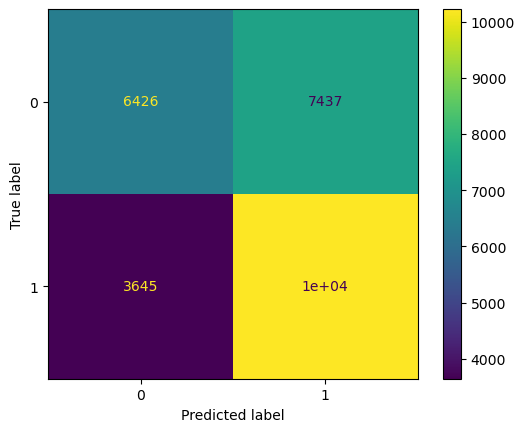

In [74]:
conf_matrix = confusion_matrix(ytest, ts_pred)
conf_display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
conf_display.plot()
print(conf_matrix)

In [75]:
tr_score=accuracy_score(ytrain,tr_pred)
ts_score=accuracy_score(ytest,ts_pred)
print('tr_score= ', tr_score)
print('ts_score= ', ts_score)

tr_recall_score=recall_score(ytrain,tr_pred)
ts_recall_score=recall_score(ytest,ts_pred)
print('tr_recall_score= ', tr_recall_score)
print('ts_recall_score= ', ts_recall_score)

tr_f1_score=f1_score(ytrain,tr_pred)
ts_f1_score=f1_score(ytest,ts_pred)
print('tr_f1_score= ', tr_f1_score)
print('ts_f1_score= ', ts_f1_score)

tr_precision_score=precision_score(ytrain,tr_pred)
ts_precision_score=precision_score(ytest,ts_pred)
print('tr_precision_score= ', tr_precision_score)
print('ts_precision_score= ', ts_precision_score)

tr_score=  0.5997403370209082
ts_score=  0.6003462079411447
tr_recall_score=  0.7365792083671445
ts_recall_score=  0.7371267849415837
tr_f1_score=  0.647912568999429
ts_f1_score=  0.648458317472402
tr_precision_score=  0.5782990953237156
ts_precision_score=  0.5788311247026844


In [76]:
# Tuning model with gidsearchCV

In [77]:
tuning_params= {'penalty':['l1', 'l2', 'elasticnet'], 'C':[0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5], 'random_state':[21,42,84,96],
         'max_iter':[50,70,100,120]}

In [78]:
from sklearn.model_selection import GridSearchCV
lr_gscv = GridSearchCV(lr, param_grid=tuning_params, cv=5)
lr_gscv.fit(xtrain,ytrain)

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_iter': [50, 70, 100, 120],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [21, 42, 84, 96]})

In [79]:
lr_gscv.best_params_

{'C': 0.02, 'max_iter': 50, 'penalty': 'l2', 'random_state': 21}

In [80]:
lr= LogisticRegression(penalty='l2', C=0.02, max_iter=50, random_state=21)
model= lr.fit(xtrain, ytrain)

tr_pred= model.predict(xtrain)
ts_pred= model.predict(xtest)

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 6420  7443]
 [ 3633 10233]]


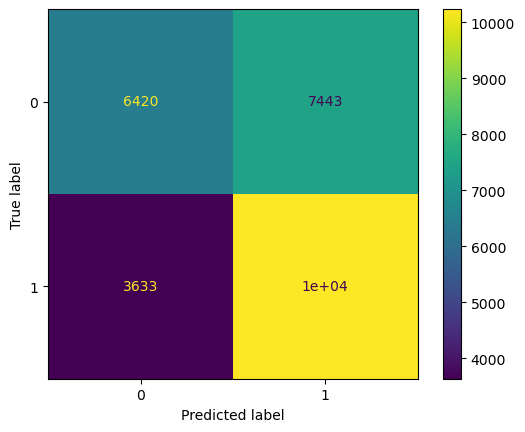

In [81]:
conf_matrix = confusion_matrix(ytest, ts_pred)
conf_display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
conf_display.plot()
print(conf_matrix)

In [82]:
tr_score=accuracy_score(ytrain,tr_pred)
ts_score=accuracy_score(ytest,ts_pred)
print('tr_score= ', tr_score)
print('ts_score= ', ts_score)

tr_recall_score=recall_score(ytrain,tr_pred)
ts_recall_score=recall_score(ytest,ts_pred)
print('tr_recall_score= ', tr_recall_score)
print('ts_recall_score= ', ts_recall_score)

tr_f1_score=f1_score(ytrain,tr_pred)
ts_f1_score=f1_score(ytest,ts_pred)
print('tr_f1_score= ', tr_f1_score)
print('ts_f1_score= ', ts_f1_score)

tr_precision_score=precision_score(ytrain,tr_pred)
ts_precision_score=precision_score(ytest,ts_pred)
print('tr_precision_score= ', tr_precision_score)
print('ts_precision_score= ', ts_precision_score)

tr_score=  0.5998575460045261
ts_score=  0.60056258790436
tr_recall_score=  0.7371382201785232
ts_recall_score=  0.7379922111639983
tr_f1_score=  0.6481524057175928
ts_f1_score=  0.6488491535096063
tr_precision_score=  0.5783367759825698
ts_precision_score=  0.5789205702647657


In [83]:
# Logistic Regression is a bad model here

### Decision Tree Classifier Model

In [84]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(random_state=42)

model= dtc.fit(xtrain,ytrain)

tr_pred= model.predict(xtrain)
ts_pred= model.predict(xtest)

[[11067  2796]
 [ 2910 10956]]


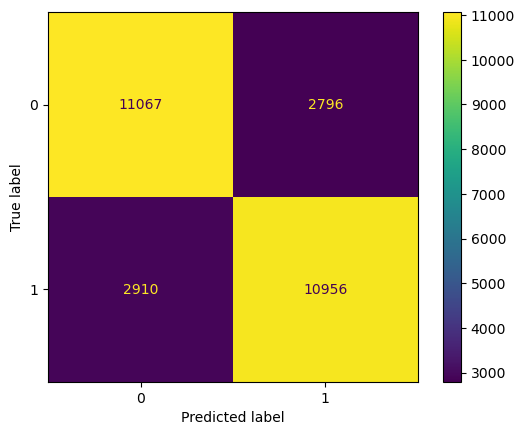

In [85]:
conf_matrix = confusion_matrix(ytest, ts_pred)
conf_display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
conf_display.plot()
print(conf_matrix)

In [86]:
tr_score=accuracy_score(ytrain,tr_pred)
ts_score=accuracy_score(ytest,ts_pred)
print('tr_score= ', tr_score)
print('ts_score= ', ts_score)

tr_recall_score=recall_score(ytrain,tr_pred)
ts_recall_score=recall_score(ytest,ts_pred)
print('tr_recall_score= ', tr_recall_score)
print('ts_recall_score= ', ts_recall_score)

tr_f1_score=f1_score(ytrain,tr_pred)
ts_f1_score=f1_score(ytest,ts_pred)
print('tr_f1_score= ', tr_f1_score)
print('ts_f1_score= ', ts_f1_score)

tr_precision_score=precision_score(ytrain,tr_pred)
ts_precision_score=precision_score(ytest,ts_pred)
print('tr_precision_score= ', tr_precision_score)
print('ts_precision_score= ', ts_precision_score)

tr_score=  1.0
ts_score=  0.7942226549821486
tr_recall_score=  1.0
ts_recall_score=  0.7901341410644742
tr_f1_score=  1.0
ts_f1_score=  0.7933956115576798
tr_precision_score=  1.0
ts_precision_score=  0.7966841186736475


In [87]:
# Overfitting is happening here.Model is performing good on training data as compared to testing data

### Xgboost model

In [88]:
import xgboost as xgb

In [89]:
params = {
    'booster': 'gbtree',            # Tree-based boosting model
    'objective': 'binary:logistic', # Binary classification task
    'learning_rate': 0.1,           # Shrinkage applied to each new tree
    'max_depth': 3,                 # Maximum depth of each tree
    'subsample': 0.8,               # Fraction of training data to randomly sample for each boosting round
    'colsample_bytree': 0.8,        # Fraction of features to randomly sample for each tree
    'n_estimators': 50             # Number of boosting rounds (trees) to build
}

model = xgb.XGBClassifier(**params)
model.fit(xtrain,ytrain)

tr_pred= model.predict(xtrain)
ts_pred= model.predict(xtest)

[[ 7258  6605]
 [ 2734 11132]]


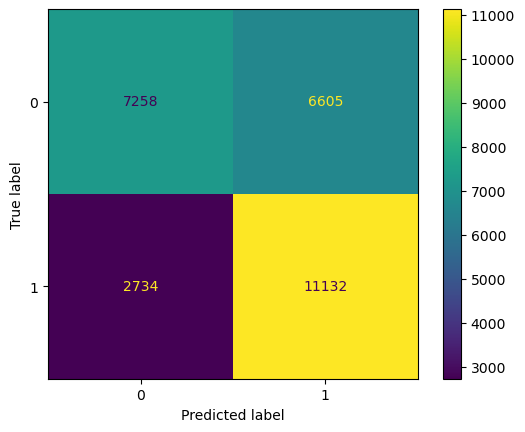

In [90]:
conf_matrix = confusion_matrix(ytest, ts_pred)
conf_display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
conf_display.plot()
print(conf_matrix)

In [91]:
tr_score=accuracy_score(ytrain,tr_pred)
ts_score=accuracy_score(ytest,ts_pred)
print('tr_score= ', tr_score)
print('ts_score= ', ts_score)

tr_recall_score=recall_score(ytrain,tr_pred)
ts_recall_score=recall_score(ytest,ts_pred)
print('tr_recall_score= ', tr_recall_score)
print('ts_recall_score= ', ts_recall_score)

tr_f1_score=f1_score(ytrain,tr_pred)
ts_f1_score=f1_score(ytest,ts_pred)
print('tr_f1_score= ', tr_f1_score)
print('ts_f1_score= ', ts_f1_score)

tr_precision_score=precision_score(ytrain,tr_pred)
ts_precision_score=precision_score(ytest,ts_pred)
print('tr_precision_score= ', tr_precision_score)
print('ts_precision_score= ', ts_precision_score)

tr_score=  0.6630061399475264
ts_score=  0.6632045872552201
tr_recall_score=  0.7989000090163195
ts_recall_score=  0.8028270589932208
tr_f1_score=  0.7033171142138225
ts_f1_score=  0.7044900800556909
tr_precision_score=  0.6281618647912885
ts_precision_score=  0.627614590968033


In [92]:
# Xgboost model is a bad model here

### Random Forest Model

In [93]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
                            
model.fit(xtrain,ytrain)

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [94]:
tr_pred= model.predict(xtrain)
ts_pred= model.predict(xtest)

In [95]:
# Checking scores

[[11250  2613]
 [ 1748 12118]]


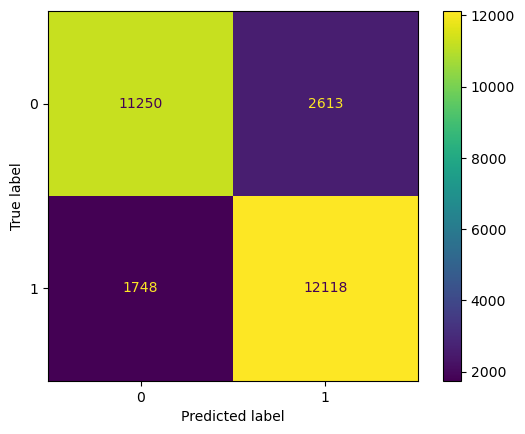

In [96]:
conf_matrix = confusion_matrix(ytest, ts_pred)
conf_display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
conf_display.plot()
print(conf_matrix)

In [97]:
tr_score=accuracy_score(ytrain,tr_pred)
ts_score=accuracy_score(ytest,ts_pred)
print('tr_score= ', tr_score)
print('ts_score= ', ts_score)

tr_recall_score=recall_score(ytrain,tr_pred)
ts_recall_score=recall_score(ytest,ts_pred)
print('tr_recall_score= ', tr_recall_score)
print('ts_recall_score= ', ts_recall_score)

tr_f1_score=f1_score(ytrain,tr_pred)
ts_f1_score=f1_score(ytest,ts_pred)
print('tr_f1_score= ', tr_f1_score)
print('ts_f1_score= ', ts_f1_score)

tr_precision_score=precision_score(ytrain,tr_pred)
ts_precision_score=precision_score(ytest,ts_pred)
print('tr_precision_score= ', tr_precision_score)
print('ts_precision_score= ', ts_precision_score)

tr_score=  1.0
ts_score=  0.8427278300696022
tr_recall_score=  1.0
ts_recall_score=  0.8739362469349488
tr_f1_score=  1.0
ts_f1_score=  0.847501486169878
tr_precision_score=  1.0
ts_precision_score=  0.8226189668046976


In [98]:
# Good Model

In [99]:
# Tuning model with gidsearchCV

In [100]:
tuning_params= {'n_estimators':[40,50,70,100], 'criterion':['gini', 'entropy'], 'max_depth':[2,5,10,15], 'min_samples_split':[2,5,10], 
                     'min_samples_leaf':[1,2,4]}
        

In [108]:
from sklearn.model_selection import GridSearchCV
rfc_gscv = GridSearchCV(RandomForestClassifier(), param_grid=tuning_params, cv=5)
rfc_gscv.fit(xtrain,ytrain)

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

KeyboardInterrupt: 

### Random forest with adaboost

In [101]:
from sklearn.ensemble import AdaBoostClassifier

rfc= RandomForestClassifier()

model= AdaBoostClassifier(rfc, n_estimators=50)

In [102]:
model.fit(xtrain,ytrain)

tr_pred= model.predict(xtrain)
ts_pred= model.predict(xtest)

C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Kumar\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[11336  2527]
 [ 1703 12163]]


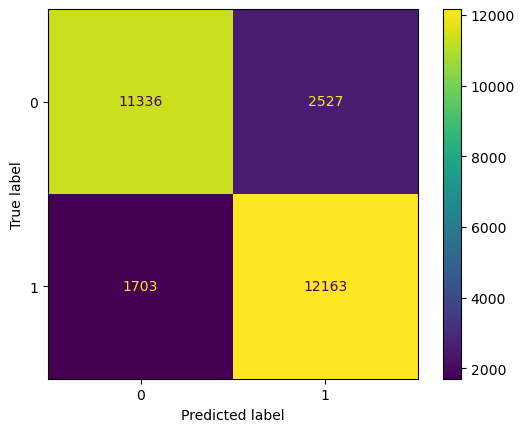

In [103]:
conf_matrix = confusion_matrix(ytest, ts_pred)
conf_display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
conf_display.plot()
print(conf_matrix)

In [104]:
tr_score=accuracy_score(ytrain,tr_pred)
ts_score=accuracy_score(ytest,ts_pred)
print('tr_score= ', tr_score)
print('ts_score= ', ts_score)

tr_recall_score=recall_score(ytrain,tr_pred)
ts_recall_score=recall_score(ytest,ts_pred)
print('tr_recall_score= ', tr_recall_score)
print('ts_recall_score= ', ts_recall_score)

tr_f1_score=f1_score(ytrain,tr_pred)
ts_f1_score=f1_score(ytest,ts_pred)
print('tr_f1_score= ', tr_f1_score)
print('ts_f1_score= ', ts_f1_score)

tr_precision_score=precision_score(ytrain,tr_pred)
ts_precision_score=precision_score(ytest,ts_pred)
print('tr_precision_score= ', tr_precision_score)
print('ts_precision_score= ', ts_precision_score)

tr_score=  1.0
ts_score=  0.8474521259331386
tr_recall_score=  1.0
ts_recall_score=  0.8771815952690033
tr_f1_score=  1.0
ts_f1_score=  0.8518700098052948
tr_precision_score=  1.0
ts_precision_score=  0.8279782164737917


In [105]:
# Good Model.
# In all models Random Forest Classifier is my best model
# Here Precision and recall both are useful.
# Precision: Ratio of true positives to all predicted positives (avoiding false positives)
# Recall: Ratio of true positives to all actual positives (avoiding false negatives)
# There is always trade-off between Precision and Recall, so it will depend upon organization what is good for them.
# If someone is able to fully pay the loan and they are classified in not able to pay('default'),then its cost will be generally
# high for the company.For that we have to minimize false negatives.We have to improve our Recall score.

# High cost of missed defaults	Recall	Minimize false negatives (loans to risky borrowers).

# High cost of rejected good applicants	Precision	Minimize false positives (rejections of good borrowers)

### Testing Data

In [106]:
df2=pd.read_csv("C:/Users/Nikhil Kumar/Desktop/Mani Assignment/loan_status_project/credit/credit_test.csv")

In [107]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  float64
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since last delinquent  4694 non-null   float64
 12  Number of Open Accounts       10000 non-null  float64
 13  N

In [108]:
df2.isna().sum()

Loan ID                          353
Customer ID                      353
Current Loan Amount              353
Term                             353
Credit Score                    2334
Annual Income                   2334
Years in current job             780
Home Ownership                   353
Purpose                          353
Monthly Debt                     353
Years of Credit History          353
Months since last delinquent    5659
Number of Open Accounts          353
Number of Credit Problems        353
Current Credit Balance           353
Maximum Open Credit              353
Bankruptcies                     375
Tax Liens                        354
dtype: int64

In [109]:
df2[df2['Loan ID'].isna()]

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# We will delete these rows from our data because all columns are having null values here.

In [111]:
df2 = df2.dropna(axis = 0, subset = ['Loan ID'])

In [112]:
df2.isna().sum().sort_values(ascending=False)

Months since last delinquent    5306
Credit Score                    1981
Annual Income                   1981
Years in current job             427
Bankruptcies                      22
Tax Liens                          1
Maximum Open Credit                0
Current Credit Balance             0
Number of Credit Problems          0
Number of Open Accounts            0
Loan ID                            0
Years of Credit History            0
Customer ID                        0
Purpose                            0
Home Ownership                     0
Term                               0
Current Loan Amount                0
Monthly Debt                       0
dtype: int64

In [113]:
df2 = df2.dropna(axis = 0, subset = ['Bankruptcies', 'Tax Liens'])

In [114]:
df2.isna().sum().sort_values(ascending=False)

Months since last delinquent    5306
Credit Score                    1978
Annual Income                   1978
Years in current job             427
Loan ID                            0
Bankruptcies                       0
Maximum Open Credit                0
Current Credit Balance             0
Number of Credit Problems          0
Number of Open Accounts            0
Monthly Debt                       0
Years of Credit History            0
Customer ID                        0
Purpose                            0
Home Ownership                     0
Term                               0
Current Loan Amount                0
Tax Liens                          0
dtype: int64

In [115]:
df2['Credit Score']= df2['Credit Score'].fillna(df2['Credit Score'].mean())

In [116]:
df2['Annual Income']= df2['Annual Income'].fillna(df2['Annual Income'].mean())

In [117]:
df2['Years in current job'] = df2['Years in current job'].fillna(df2['Years in current job'].mode()[0])

In [118]:
df2= df2.drop(['Months since last delinquent'], axis=1)

In [119]:
df2.isna().sum().sort_values(ascending=False)

Loan ID                      0
Monthly Debt                 0
Bankruptcies                 0
Maximum Open Credit          0
Current Credit Balance       0
Number of Credit Problems    0
Number of Open Accounts      0
Years of Credit History      0
Purpose                      0
Customer ID                  0
Home Ownership               0
Years in current job         0
Annual Income                0
Credit Score                 0
Term                         0
Current Loan Amount          0
Tax Liens                    0
dtype: int64

In [120]:
df2['Debt_to_Income'] = (df2['Monthly Debt']) / (df2['Annual Income']/12)
df2['Loan_to_Income'] = (df2['Current Loan Amount']) / (df2['Annual Income'])

In [121]:
df2.isna().sum().sort_values(ascending=False)

Loan ID                      0
Years of Credit History      0
Debt_to_Income               0
Tax Liens                    0
Bankruptcies                 0
Maximum Open Credit          0
Current Credit Balance       0
Number of Credit Problems    0
Number of Open Accounts      0
Monthly Debt                 0
Customer ID                  0
Purpose                      0
Home Ownership               0
Years in current job         0
Annual Income                0
Credit Score                 0
Term                         0
Current Loan Amount          0
Loan_to_Income               0
dtype: int64

In [122]:
df2.shape

(9978, 19)

### Preprocessing

In [123]:
cat=[]
con=[]
for i in df2.columns:
    if df2[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)

In [124]:
Xcat=df2[cat]
Xcon=df2[con]

In [125]:
Xcon= pd.DataFrame(ss.fit_transform(Xcon),columns=con)

In [126]:
for i in Xcat.columns:
    Xcat[i]=le.fit_transform(Xcat[i])

C:\Users\Nikhil Kumar\AppData\Local\Temp\ipykernel_932\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\Nikhil Kumar\AppData\Local\Temp\ipykernel_932\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\Nikhil Kumar\AppData\Local\Temp\ipykernel_932\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [127]:
Xn=Xcon.join(Xcat)

In [128]:
Xn

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Debt_to_Income,Loan_to_Income,Loan ID,Customer ID,Term,Years in current job,Home Ownership,Purpose
0,-0.347614,-2.505727e-01,9.048175e-01,1.899448,0.508194,-0.415943,-0.330803,0.851868,0.199616,-0.332499,-0.106994,0.814924,-0.307705,9659.0,8695.0,1.0,1.0,1.0,3.0
1,-0.358527,-2.603889e-01,7.057484e-01,1.465786,0.166261,-0.017223,-0.330803,1.000307,0.116661,-0.332499,-0.106994,0.657602,-0.312235,4315.0,884.0,1.0,1.0,1.0,3.0
2,-0.362111,-2.792662e-01,-6.409590e-01,-0.811456,-0.816799,-0.216583,-0.330803,-0.649840,-0.160560,-0.332499,-0.106994,-0.616620,-0.311152,9668.0,1722.0,1.0,2.0,3.0,3.0
3,-0.361391,-2.656745e-01,-7.579249e-01,-0.135516,-0.246909,0.979579,1.663610,-0.345038,-0.083640,2.525105,-0.106994,0.983490,-0.309706,5125.0,735.0,1.0,1.0,3.0,3.0
4,-0.356775,-2.528379e-01,5.026754e-01,1.696019,1.106578,0.580858,-0.330803,0.177068,-0.117594,-0.332499,-0.106994,1.107055,-0.310959,333.0,2217.0,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9973,-0.361974,-2.626542e-01,1.855905e-01,-1.101535,-0.816799,-0.415943,-0.330803,-0.524926,-0.243030,-0.332499,-0.106994,-1.488596,-0.313245,3475.0,3059.0,0.0,5.0,1.0,5.0
9974,-0.362774,-2.724704e-01,-7.796286e-01,-0.487999,-1.187227,-0.615304,-0.330803,-0.557744,-0.191880,-0.332499,-0.106994,0.275567,-0.311225,3244.0,849.0,1.0,1.0,3.0,3.0
9975,-0.359903,1.716886e-16,2.991712e-16,-1.137105,1.277545,-0.615304,1.663610,-0.492548,-0.063751,2.525105,-0.106994,-1.486984,-0.311537,2856.0,7690.0,0.0,6.0,3.0,2.0
9976,2.799585,-2.702051e-01,-5.112003e-01,-0.501685,-0.204168,-0.615304,1.663610,-0.272848,-0.239676,-0.332499,-0.106994,-0.218848,2.674758,2575.0,5694.0,1.0,5.0,3.0,11.0


In [129]:
Xn.isna().sum()

Current Loan Amount           0
Credit Score                  0
Annual Income                 0
Monthly Debt                  0
Years of Credit History       0
Number of Open Accounts       0
Number of Credit Problems     0
Current Credit Balance        0
Maximum Open Credit           0
Bankruptcies                  0
Tax Liens                     0
Debt_to_Income                0
Loan_to_Income                0
Loan ID                      22
Customer ID                  22
Term                         22
Years in current job         22
Home Ownership               22
Purpose                      22
dtype: int64

In [130]:
Xn = Xn.dropna(axis = 0, subset = ['Loan ID'])

In [131]:
Xn.isna().sum()

Current Loan Amount          0
Credit Score                 0
Annual Income                0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
Debt_to_Income               0
Loan_to_Income               0
Loan ID                      0
Customer ID                  0
Term                         0
Years in current job         0
Home Ownership               0
Purpose                      0
dtype: int64

In [132]:
Z=X.columns
q=Xn.columns

In [133]:
s=[]
for i in q:
    if i not in Z:
        s.append(i)

In [134]:
s

['Bankruptcies',
 'Tax Liens',
 'Loan ID',
 'Customer ID',
 'Term',
 'Years in current job',
 'Home Ownership']

In [135]:
Xm= Xn.drop(labels=s,axis=1)

In [136]:
new_preds=model.predict(Xm)

In [137]:
Xm['Loan Status']= new_preds

In [138]:
Xm['Loan Status']

0       0
1       0
2       0
3       0
4       0
       ..
9973    0
9974    0
9975    0
9976    0
9977    0
Name: Loan Status, Length: 9956, dtype: int64

In [139]:
Xm['Loan Status'].value_counts()

Loan Status
0    9681
1     275
Name: count, dtype: int64

In [140]:
Xm['Loan Status'].replace([0,1],['Fully Paid','Charged Off'])

0       Fully Paid
1       Fully Paid
2       Fully Paid
3       Fully Paid
4       Fully Paid
           ...    
9973    Fully Paid
9974    Fully Paid
9975    Fully Paid
9976    Fully Paid
9977    Fully Paid
Name: Loan Status, Length: 9956, dtype: object

<Axes: ylabel='count'>

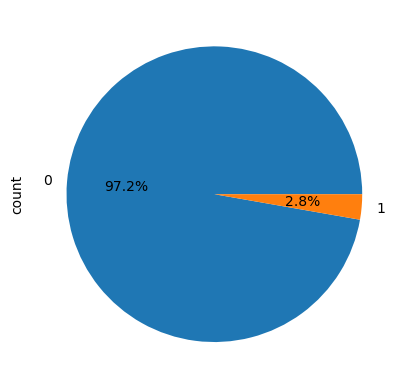

In [141]:
Xm['Loan Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')